In [9]:
from skimage import data, img_as_ubyte
from skimage.color import convert_colorspace, rgb2gray
import matplotlib.pyplot as plt
import numpy as np
from math import floor, pow

In [10]:
#funkcja skopiowana z materiałów z zajęć
def show2imgs(img1, img2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):

    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(img1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(img2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

In [11]:
from skimage import exposure

img = data.chelsea()
gamma = 0.5
gamma_oryginalna = exposure.adjust_gamma(img, gamma=gamma)

In [12]:
def mojaGamma(img, Wsp_Gamma):
    if Wsp_Gamma < 0:
        print("Współczynnik gamma nie może być ujemny!")
    else:
        imgg = img_as_ubyte(img)#przekształcenie wartości pikseli na liczcby całkowite w zakresie 0-255
        if len(img.shape) == 2:
            for i in range(img.shape[0]):
                for j in range(img.shape[1]):
                    imgg[i][j] = floor(255 * pow(img[i][j]/255, Wsp_Gamma))#obliczanie gammy dla obrazów w odcieniach szarości
        else:
            for i in range(img.shape[0]):
                for j in range(img.shape[1]):
                    for k in range(img.shape[2]):
                        img[i][j][k] = floor(255 * pow(img[i][j][k]/255, Wsp_Gamma))#obliczanie gammy dla obrazów kolorowych
 
    return img

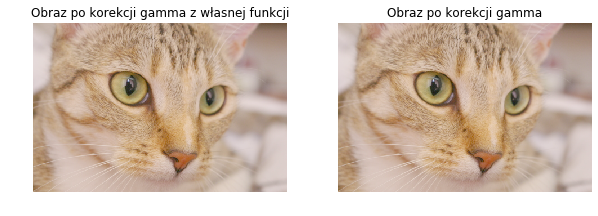

In [13]:
imgg = mojaGamma(img, 0.5)
show2imgs(imgg, gamma_oryginalna, title1='Obraz po korekcji gamma z własnej funkcji', title2='Obraz po korekcji gamma', size=(10,10))

In [14]:
def mojaBinaryzacja(imgBin, start, stop, inwersja):
    if len(imgBin.shape) == 3:
        imgGray = rgb2gray(imgBin)#przekształcenie obrazu kolorowego na obraz w odcieniach szarości
        imgBin = img_as_ubyte(imgGray)#przekształcenie wartości pikseli na liczcby całkowite w zakresie 0-255
    for i in range(imgBin.shape[0]):
            for j in range(imgBin.shape[1]):
                if inwersja == 0:
                    if imgBin[i][j] >= start and imgBin[i][j] <=stop:
                        imgBin[i][j] = 0
                    else:
                        imgBin[i][j] = 255
                else:
                    if imgBin[i][j] >= start and imgBin[i][j] <=stop:
                        imgBin[i][j] = 255
                    else:
                        imgBin[i][j] = 0
    return imgBin

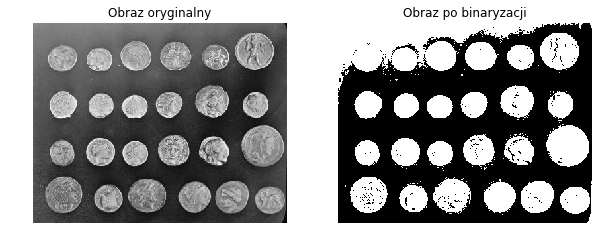

In [15]:
imgBin = data.coins()
imgg = data.coins()
start = 20
stop = 100
inwersja = 0
show2imgs(imgBin, mojaBinaryzacja(imgg, start, stop, inwersja), title1='Obraz oryginalny', title2='Obraz po binaryzacji', size=(10,10))